##Importing Libs

In [23]:
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras import layers

## Reading, spliting and processing dataset 

In [24]:
np.random.seed(42)

### Vowel

In [25]:
vowel = np.genfromtxt("vowel.csv", delimiter = ',')
np.random.shuffle(vowel)

split_1_v = int(vowel.shape[0]*0.6)
split_2_v = int(vowel.shape[0]*0.2)
train_v = vowel[ : split_1_v]
valid_v = vowel[split_1_v : -split_2_v]
test_v = vowel[-split_2_v : ]

v_max = np.max(train_v, axis = 0, keepdims = True)
v_min = np.min(train_v, axis = 0, keepdims = True)
tr_v = (train_v - v_min)/(v_max - v_min)
va_v = (valid_v - v_min)/(v_max - v_min)
te_v = (test_v - v_min)/(v_max - v_min)

xtr_v = tr_v[ : , : -1]
ytr_v = tr_v[ : , -1]
ytr_v_cat = keras.utils.to_categorical(ytr_v, num_classes = 11)
xva_v = va_v[ : , : -1]
yva_v = va_v[ : , -1]
yva_v_cat = keras.utils.to_categorical(yva_v, num_classes = 11)
xte_v = te_v[ : , : -1]
yte_v = te_v[ : , -1]
yte_v_cat = keras.utils.to_categorical(yte_v, num_classes = 11)

### Concrete


In [26]:
concrete = np.genfromtxt("concrete.csv", delimiter = ',')
np.random.shuffle(concrete)

split_1_c = int(concrete.shape[0]*0.6)
split_2_c = int(concrete.shape[0]*0.2)

train_c = concrete[ : split_1_c]
valid_c = concrete[split_1_c : -split_2_c]
teste_c = concrete[-split_2_c : ]

c_max = np.max(train_c, axis = 0, keepdims = True)
c_min = np.min(train_c, axis = 0, keepdims = True)
tr_c = (train_c - c_min)/(c_max - c_min)
va_c = (valid_c - c_min)/(c_max - c_min)
te_c = (teste_c - c_min)/(c_max - c_min)

xtr_c = tr_c[ : , : -1]
ytr_c = tr_c[ : , -1]
xva_c = va_c[ : , : -1]
yva_c = va_c[ : , -1]
xte_c = te_c[ : , : -1]
yte_c = te_c[ : , -1]

## Models 

Grid de parâmetros

In [27]:
batch_param = [16, 32, 64, 128] #batch size
tf_units_param = [5, 15, 45] #units
momentum_param = [0.6, 0.9] #momentum 

models_Log_C = []
history_Log_C = []
models_Log_V = []
history_Log_V = []

Exec

In [28]:
for batch_size in batch_param:
  for tf_units in tf_units_param:
    for momentum in momentum_param:
      sgd = tf.keras.optimizers.legacy.SGD(momentum = momentum, nesterov = True)
      input_c = keras.Input(shape = concrete.shape[1] - 1)
      input_v = keras.Input(shape = vowel.shape[1] - 1)
      hidden_c = layers.Dense(tf_units, activation = 'tanh')(input_c)
      hidden_v = layers.Dense(tf_units, activation = 'relu')(input_v)
      output_c = layers.Dense(1)(hidden_c)
      output_v = layers.Dense(11, activation = 'softmax')(hidden_v)
      modelc = keras.Model(input_c, output_c)
      modelv = keras.Model(input_v, output_v)
      modelc.compile(optimizer = sgd, loss = "mean_squared_error")
      modelv.compile(optimizer = sgd, loss = "categorical_crossentropy")
      historyc = modelc.fit(x = xtr_c, y = ytr_c, batch_size = batch_size, validation_data = (xva_c, yva_c), epochs = 100, verbose = 0)
      historyv = modelv.fit(x = xtr_v, y = ytr_v_cat, batch_size = batch_size, validation_data = (xva_v, yva_v_cat), epochs = 100, verbose = 0)
      models_Log_C.append(modelc)
      models_Log_V.append(modelv)
      history_Log_C.append(historyc)
      history_Log_V.append(historyv)

In [29]:
vl_v = np.zeros(len(batch_param)*len(tf_units_param)*len(momentum_param))
vl_c = np.zeros(len(batch_param)*len(tf_units_param)*len(momentum_param))

Concrete plot

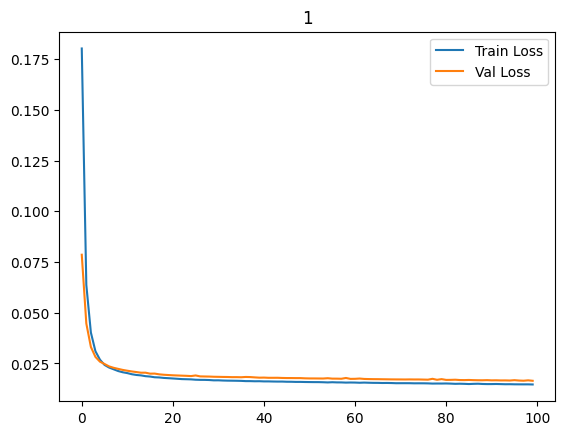

Train Loss(Final): 0.014661772176623344
Val Loss(Final: 0.016483480110764503
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



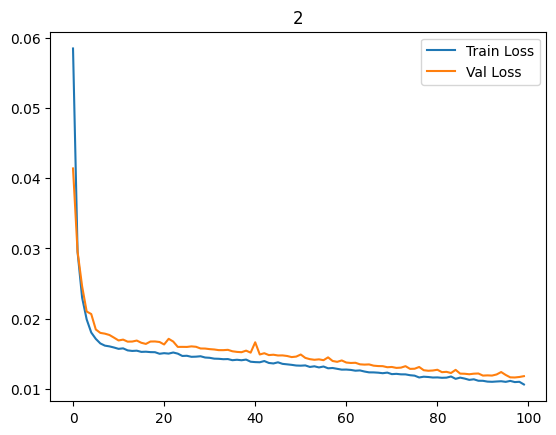

Train Loss(Final): 0.010650347918272018
Val Loss(Final: 0.01183514017611742
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



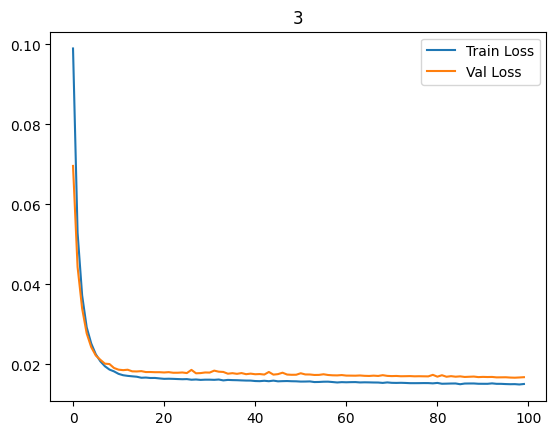

Train Loss(Final): 0.01511775515973568
Val Loss(Final: 0.01681862585246563
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



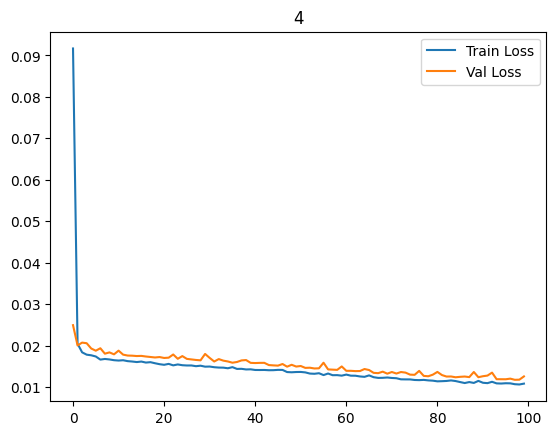

Train Loss(Final): 0.010829668492078781
Val Loss(Final: 0.012568263337016106
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



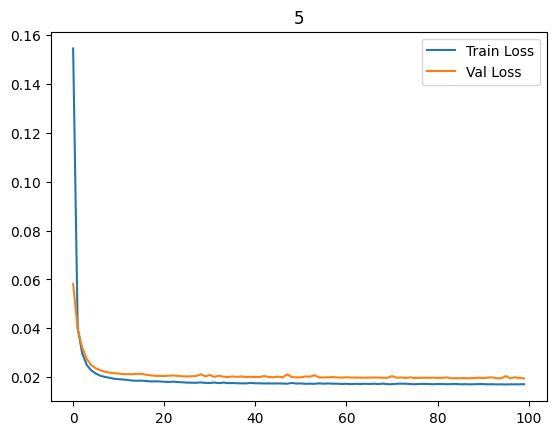

Train Loss(Final): 0.017081433907151222
Val Loss(Final: 0.019452422857284546
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



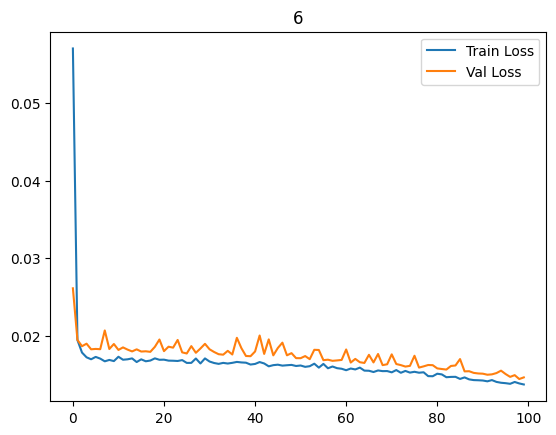

Train Loss(Final): 0.013722948729991913
Val Loss(Final: 0.014636821113526821
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



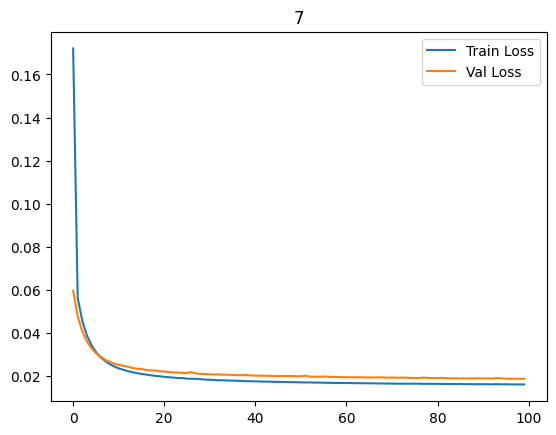

Train Loss(Final): 0.016141269356012344
Val Loss(Final: 0.018754469230771065
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



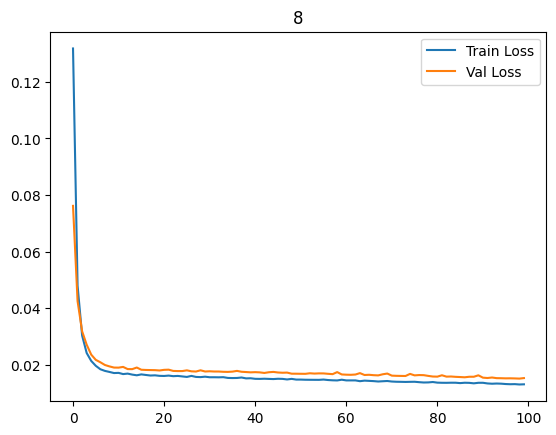

Train Loss(Final): 0.01304486021399498
Val Loss(Final: 0.015249728225171566
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



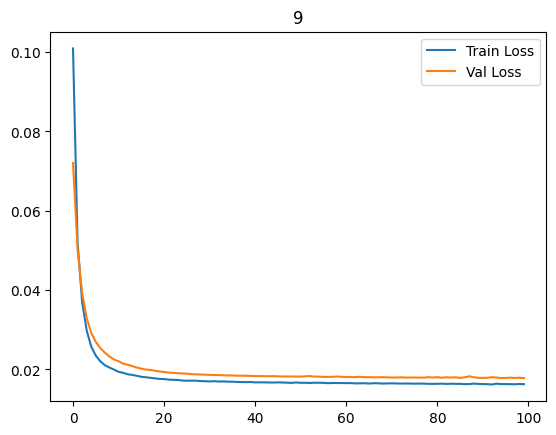

Train Loss(Final): 0.01625969260931015
Val Loss(Final: 0.017807958647608757
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



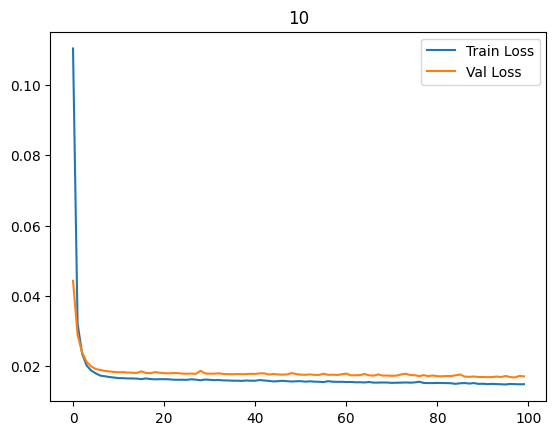

Train Loss(Final): 0.014865687116980553
Val Loss(Final: 0.017096899449825287
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



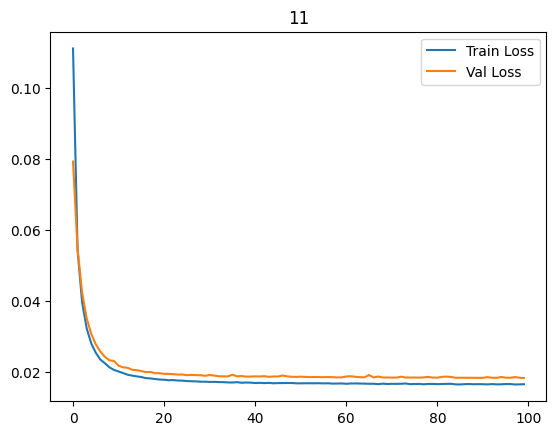

Train Loss(Final): 0.016467327252030373
Val Loss(Final: 0.018218522891402245
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



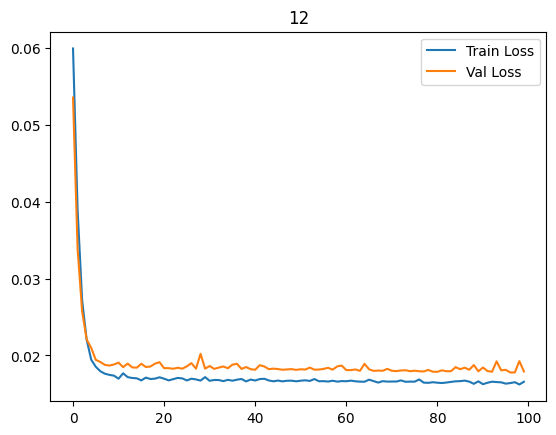

Train Loss(Final): 0.016584590077400208
Val Loss(Final: 0.017924049869179726
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



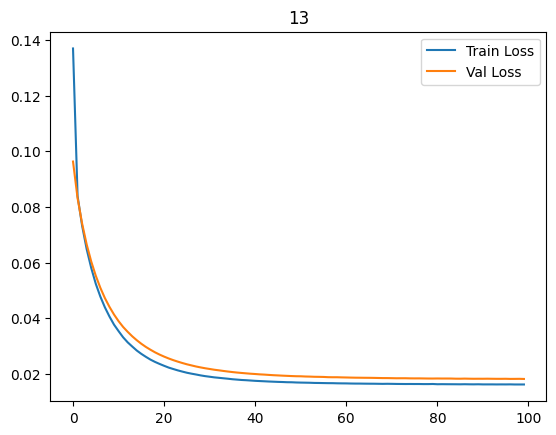

Train Loss(Final): 0.016168415546417236
Val Loss(Final: 0.01815219037234783
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



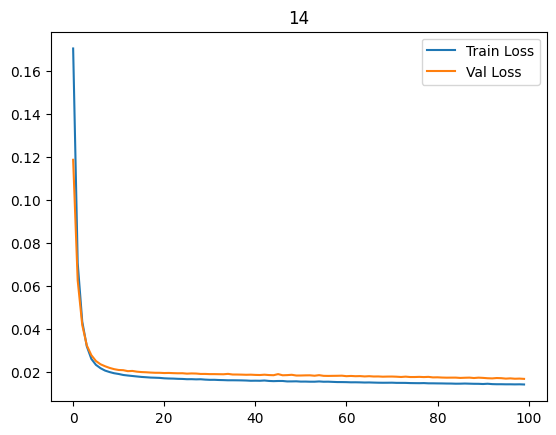

Train Loss(Final): 0.014311189763247967
Val Loss(Final: 0.016909105703234673
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



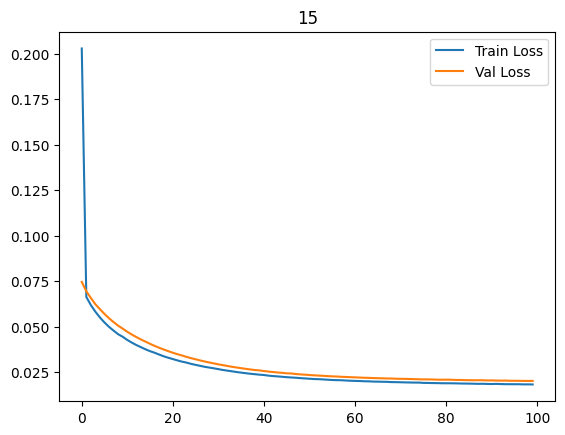

Train Loss(Final): 0.01828134059906006
Val Loss(Final: 0.020248809829354286
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



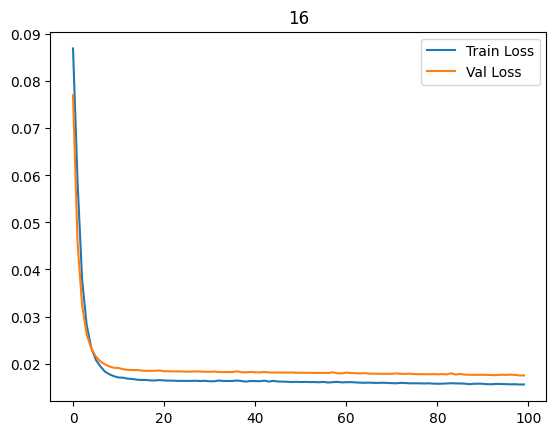

Train Loss(Final): 0.015568086877465248
Val Loss(Final: 0.017491482198238373
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



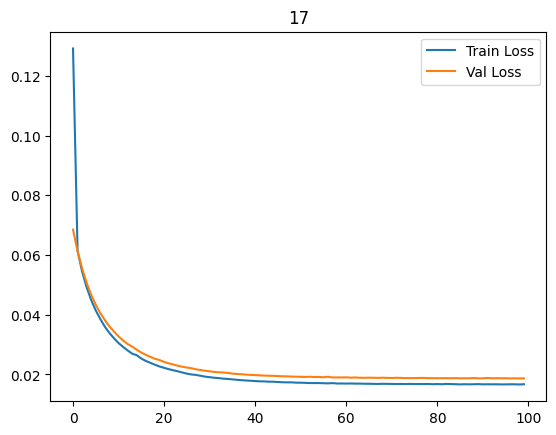

Train Loss(Final): 0.016724564135074615
Val Loss(Final: 0.018679961562156677
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



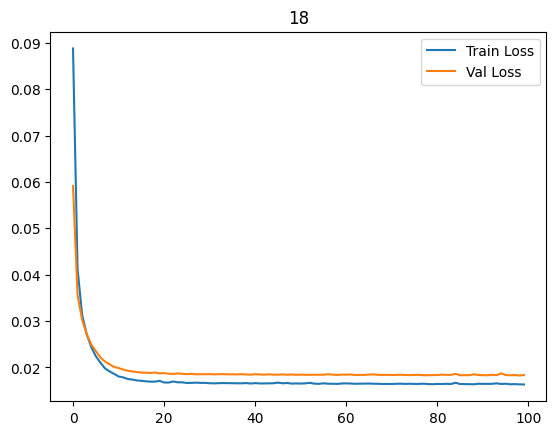

Train Loss(Final): 0.016316764056682587
Val Loss(Final: 0.018344027921557426
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



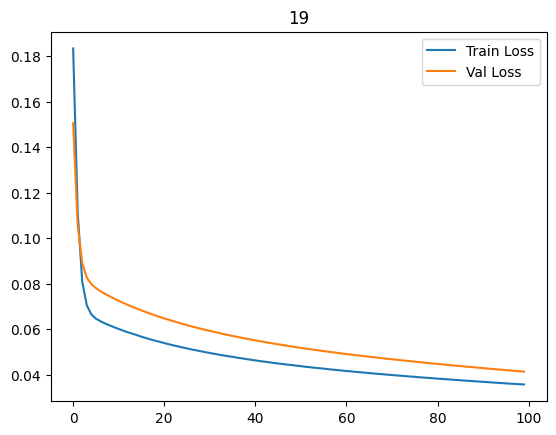

Train Loss(Final): 0.0357322059571743
Val Loss(Final: 0.04138275235891342
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



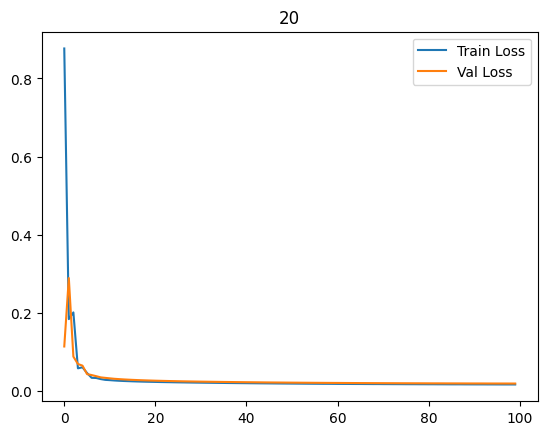

Train Loss(Final): 0.0168473981320858
Val Loss(Final: 0.01924927718937397
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



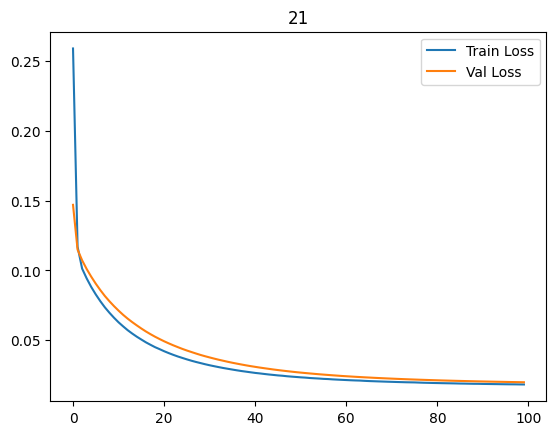

Train Loss(Final): 0.018294403329491615
Val Loss(Final: 0.01989116333425045
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



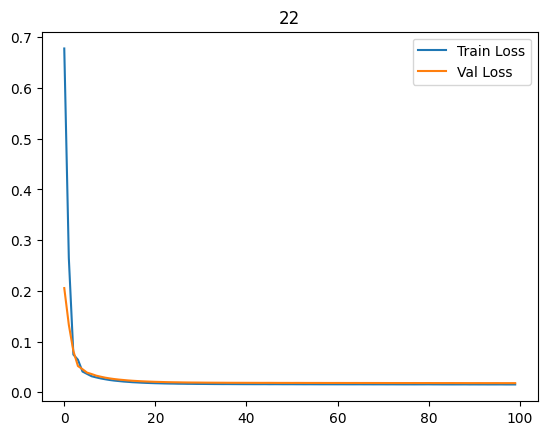

Train Loss(Final): 0.015492646023631096
Val Loss(Final: 0.018112823367118835
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



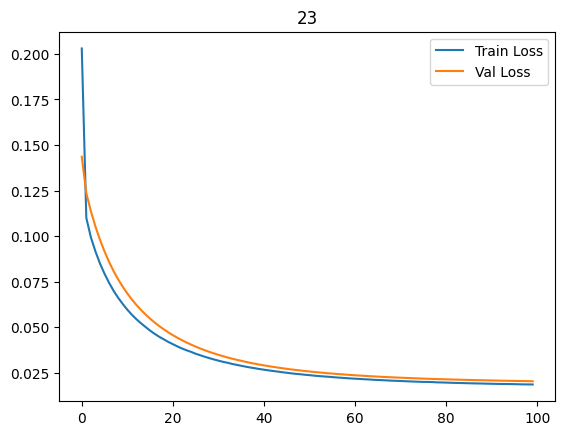

Train Loss(Final): 0.018478037789463997
Val Loss(Final: 0.020263077691197395
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



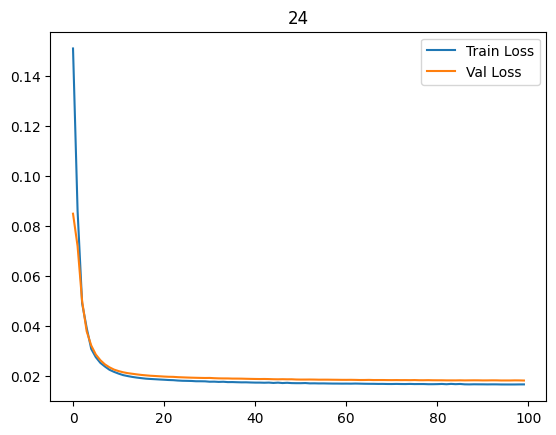

Train Loss(Final): 0.016492215916514397
Val Loss(Final: 0.018039163202047348
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



In [31]:
#Concrete
for index, h in enumerate(history_Log_C):
  plt.plot(h.history['loss'], label = 'Train Loss')
  plt.plot(h.history['val_loss'], label = 'Val Loss')
  plt.legend()
  plt.title(index + 1)
  plt.show()
  print("Train Loss(Final):", h.history['loss'][-1])
  print("Val Loss(Final:", h.history['val_loss'][-1])
  print("=-"*20)
  print("")
  vl_c[index] = h.history['val_loss'][-1]

Vowel plot

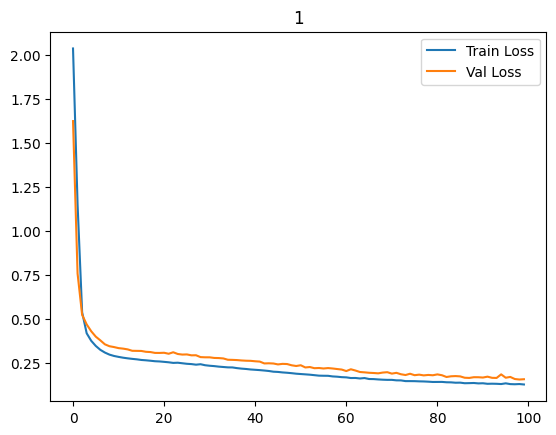

Train Loss(Final): 0.1301000416278839
Val Loss(Final: 0.15987364947795868
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



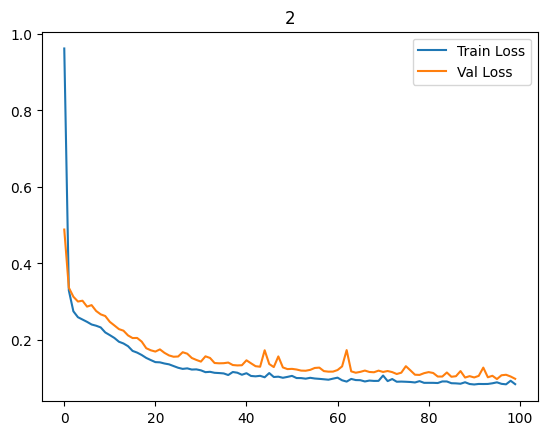

Train Loss(Final): 0.08454208076000214
Val Loss(Final: 0.09849601238965988
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



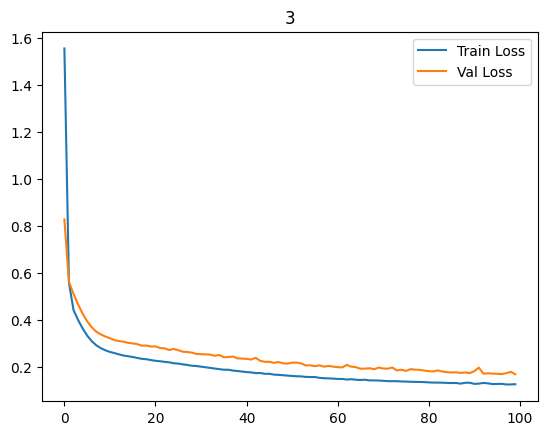

Train Loss(Final): 0.12760551273822784
Val Loss(Final: 0.16998523473739624
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



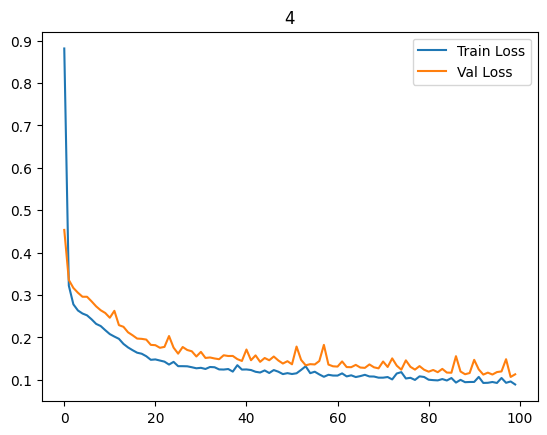

Train Loss(Final): 0.08895450085401535
Val Loss(Final: 0.11295098066329956
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



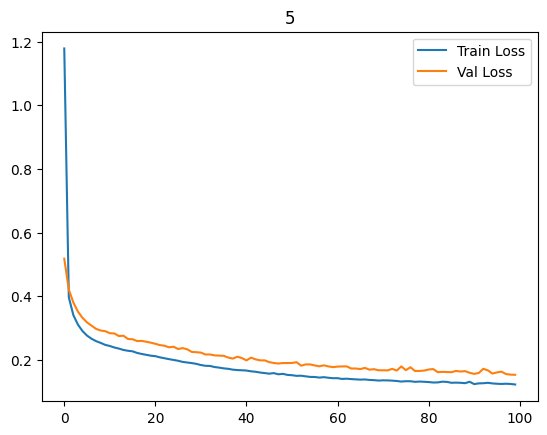

Train Loss(Final): 0.12223327904939651
Val Loss(Final: 0.15271815657615662
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



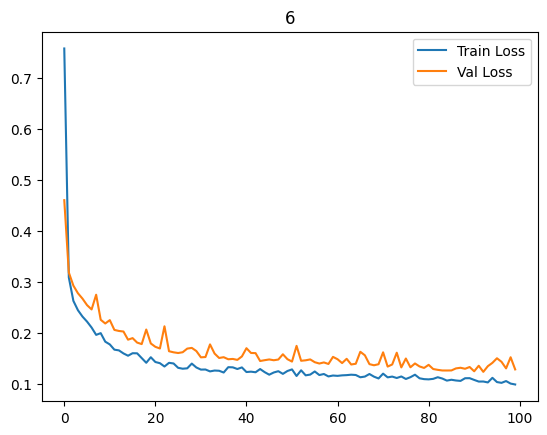

Train Loss(Final): 0.09814135730266571
Val Loss(Final: 0.12775297462940216
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



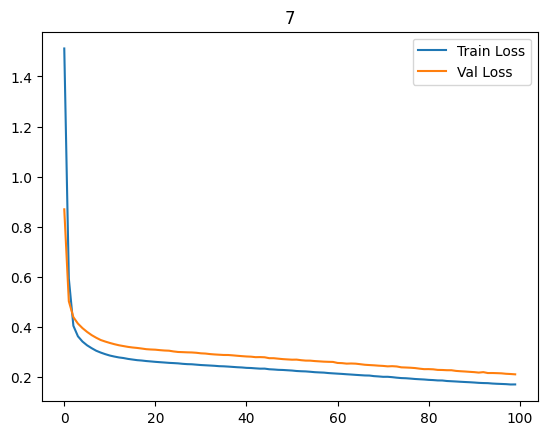

Train Loss(Final): 0.17023850977420807
Val Loss(Final: 0.21055163443088531
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



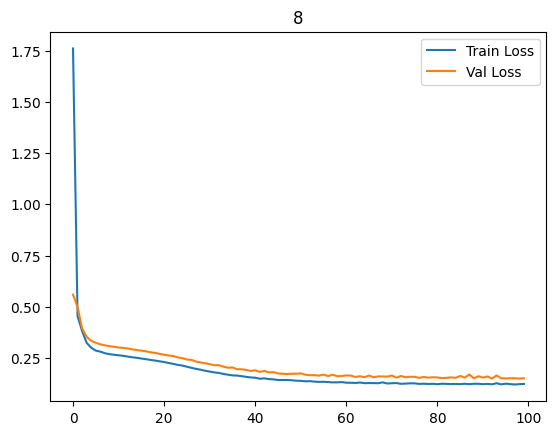

Train Loss(Final): 0.12297427654266357
Val Loss(Final: 0.15034812688827515
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



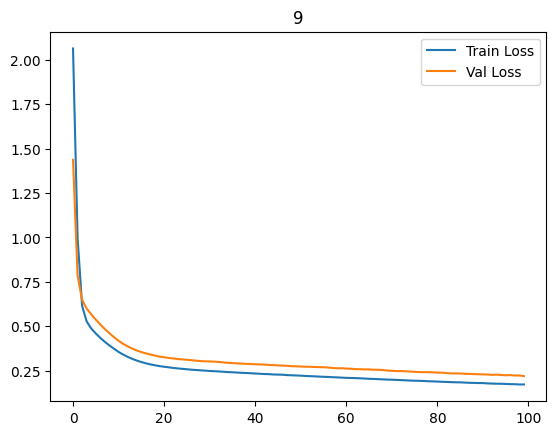

Train Loss(Final): 0.1730365753173828
Val Loss(Final: 0.21990208327770233
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



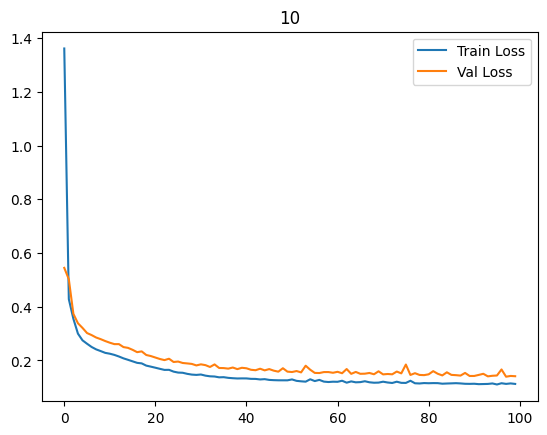

Train Loss(Final): 0.11283397674560547
Val Loss(Final: 0.14148138463497162
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



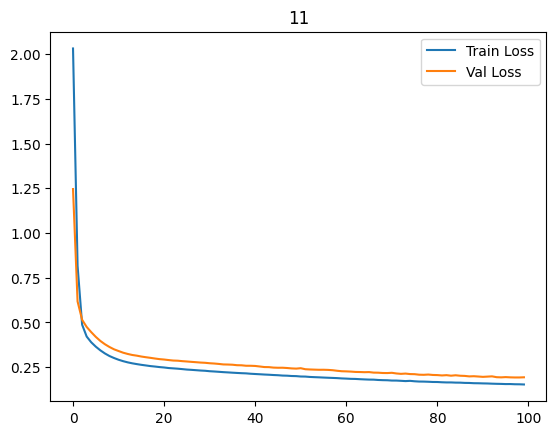

Train Loss(Final): 0.15354715287685394
Val Loss(Final: 0.19369572401046753
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



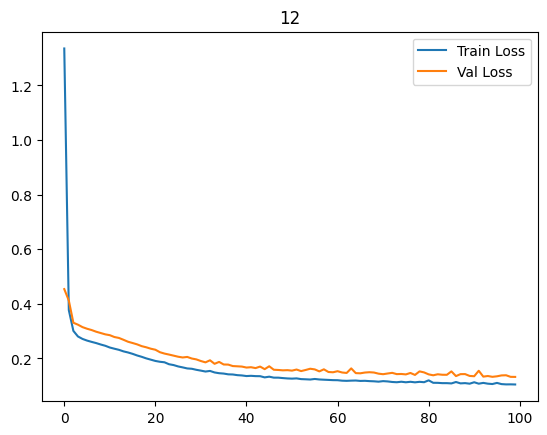

Train Loss(Final): 0.10440094769001007
Val Loss(Final: 0.13212265074253082
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



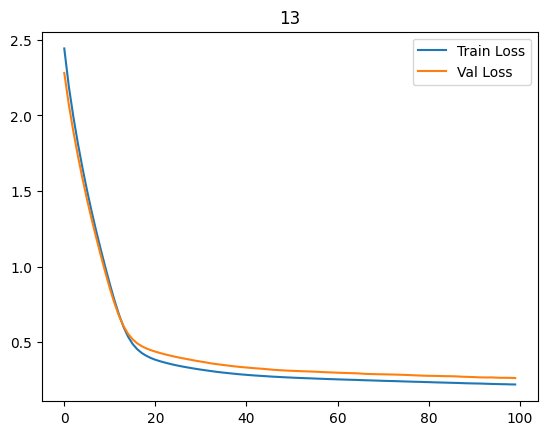

Train Loss(Final): 0.21948125958442688
Val Loss(Final: 0.26234009861946106
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



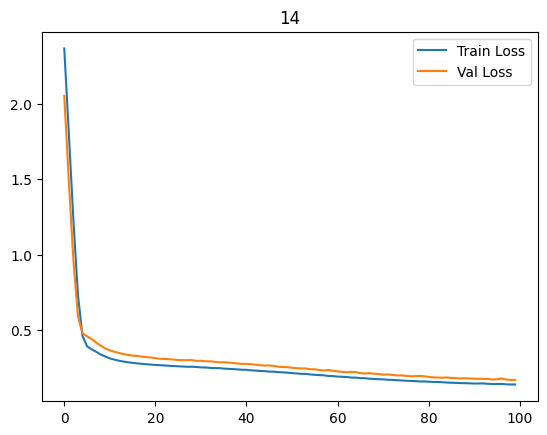

Train Loss(Final): 0.1360059678554535
Val Loss(Final: 0.1664978414773941
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



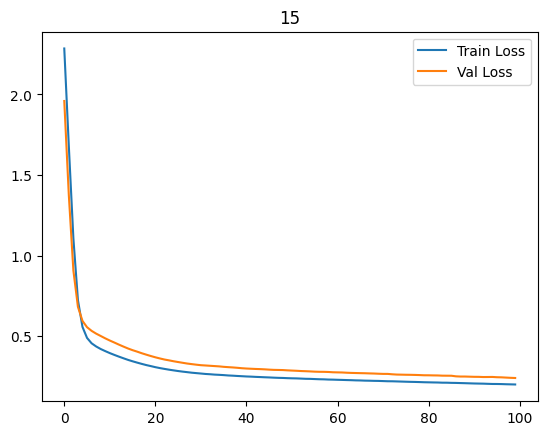

Train Loss(Final): 0.20073263347148895
Val Loss(Final: 0.24095797538757324
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



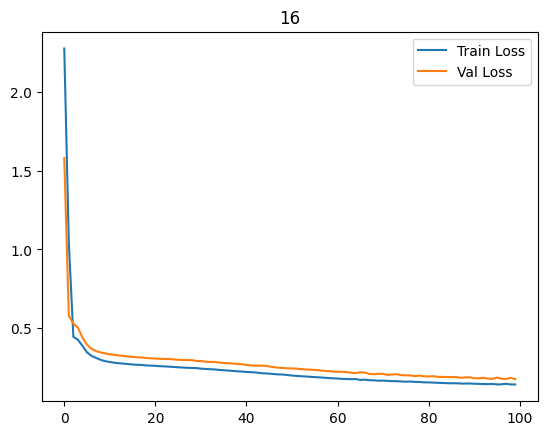

Train Loss(Final): 0.13947728276252747
Val Loss(Final: 0.17396052181720734
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



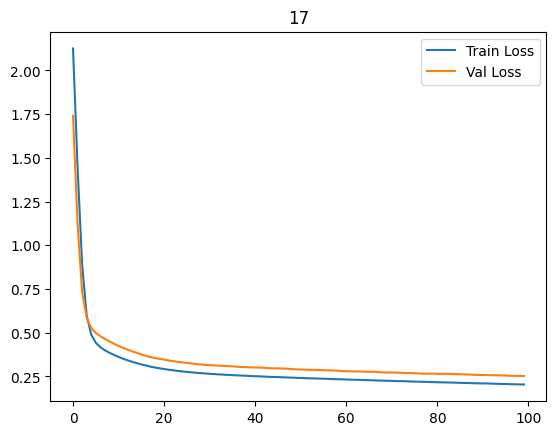

Train Loss(Final): 0.20437738299369812
Val Loss(Final: 0.25260481238365173
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



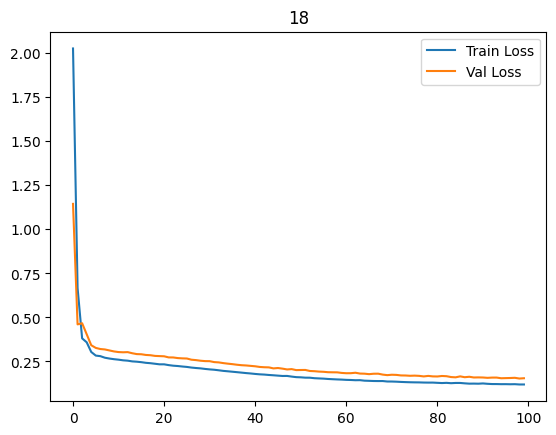

Train Loss(Final): 0.11961793899536133
Val Loss(Final: 0.1550021767616272
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



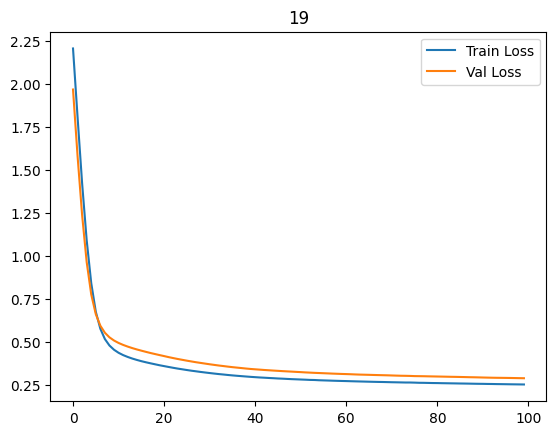

Train Loss(Final): 0.2528246343135834
Val Loss(Final: 0.28914588689804077
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



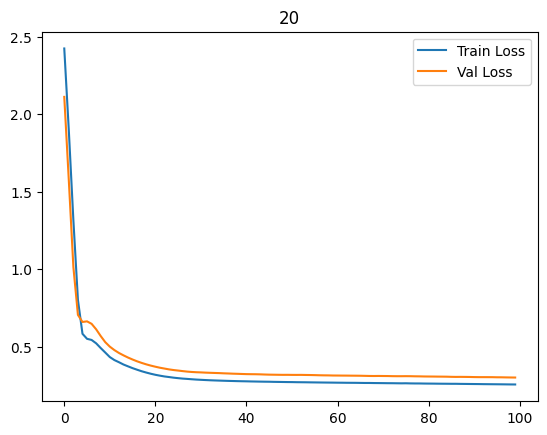

Train Loss(Final): 0.256990909576416
Val Loss(Final: 0.3017725944519043
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



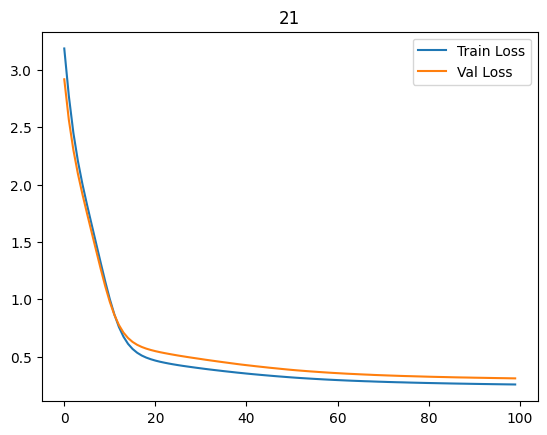

Train Loss(Final): 0.25814953446388245
Val Loss(Final: 0.31134700775146484
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



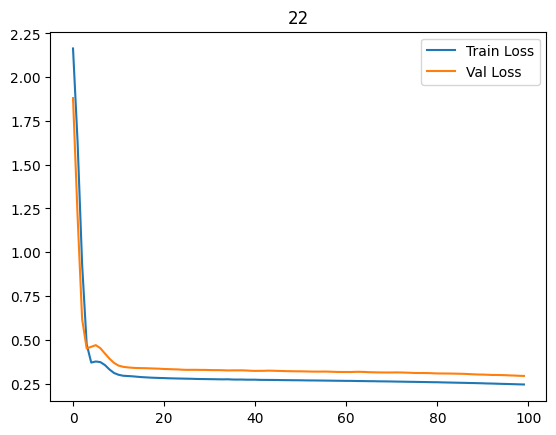

Train Loss(Final): 0.24452173709869385
Val Loss(Final: 0.2934833765029907
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



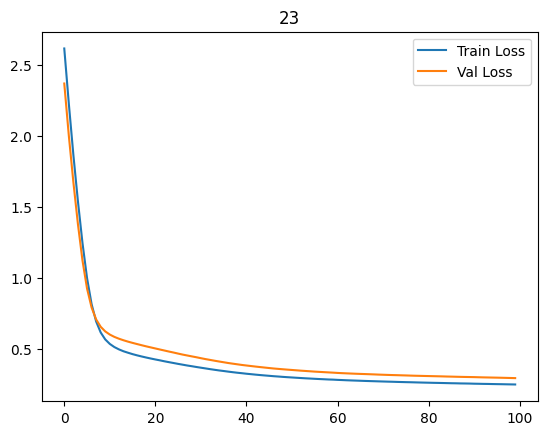

Train Loss(Final): 0.24873007833957672
Val Loss(Final: 0.29359421133995056
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



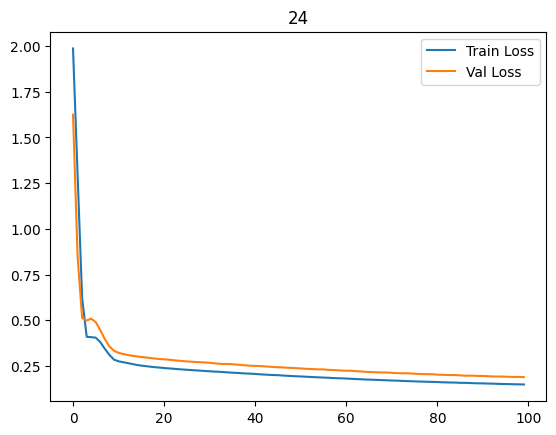

Train Loss(Final): 0.148356631398201
Val Loss(Final: 0.18840716779232025
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-



In [33]:
#Vowel
for index, h in enumerate(history_Log_V):
  plt.plot(h.history['loss'], label = 'Train Loss')
  plt.plot(h.history['val_loss'], label = 'Val Loss')
  plt.legend()
  plt.title(index + 1)
  plt.show()
  print("Train Loss(Final):", h.history['loss'][-1])
  print("Val Loss(Final:", h.history['val_loss'][-1])
  print("=-"*20)
  print("")
  vl_v[index] = h.history['val_loss'][-1]

In [34]:
ilv = np.argmin(vl_v)
ilc = np.argmin(vl_c)
batch_v_i = ilv // len(batch_param)
units_v_i = (ilv - batch_v_i*len(batch_param)) // len(tf_units_param)
momentum_v_i = (ilv - batch_v_i*len(batch_param) - units_v_i*len(tf_units_param)) // len(momentum_param)
batch_c_i = ilc // len(batch_param)
units_c_i = (ilc - batch_c_i*len(batch_param)) // len(tf_units_param)
momentum_c_i = (ilc - batch_c_i*len(batch_param) - units_c_i*len(tf_units_param)) // len(momentum_param)
batch_v = batch_param[batch_v_i]
units_v = tf_units_param[units_v_i]
momentum_v = momentum_param[momentum_v_i]
batch_c = batch_param[batch_c_i]
units_c = tf_units_param[units_c_i]
momentum_c = momentum_param[momentum_c_i]

print("=-=-=-= Concrete =-=-=-=")
print("Batch size selecionado:", batch_c)
print("Units selecionado:", units_c)
print("Momentum selecionado:", momentum_c)
print("\n")
print("=-=-=-= Vowel =-=-=-=")
print("Batch size selecionado:", batch_v)
print("Units selecionado:", units_v)
print("Momentum selecionado:", momentum_v)

=-=-=-= Concrete =-=-=-=
Batch size selecionado: 16
Units selecionado: 5
Momentum selecionado: 0.6


=-=-=-= Vowel =-=-=-=
Batch size selecionado: 16
Units selecionado: 5
Momentum selecionado: 0.6


### concrete metrics

In [35]:
sgdc = keras.optimizers.SGD(momentum = momentum_c, nesterov = True)
input_c = keras.Input(shape = concrete.shape[1] - 1)
hidden_c = layers.Dense(units_c, activation = 'tanh')(input_c)
output_c = layers.Dense(1)(hidden_c)
modelc = keras.Model(input_c, output_c)
modelc.compile(optimizer = sgdc, loss = "mean_squared_error")
modelc.fit(x = np.r_[xtr_c, xva_c], y = np.r_[ytr_c, yva_c], batch_size = batch_c, epochs = 100, verbose = 0)

In [36]:
predtrc = modelc.predict(xtr_c, verbose = 0)
rmsetrc = np.sqrt(np.mean((predtrc - ytr_c) ** 2))
maetrc = np.mean(np.absolute(predtrc - ytr_c))
w = np.where(ytr_c != 0)
mretrc = np.mean(np.absolute((predtrc[w] - ytr_c[w])/ytr_c[w]))
print("Métricas para o conjunto de Treino:")
print("RMSE: ", rmsetrc)
print("MAE: ", maetrc)
print("MRE: ", mretrc)

Métricas para o conjunto de Treino:
RMSE:  0.2670489524299548
MAE:  0.21520578306322352
MRE:  0.9052365825533327


In [37]:
predvac = modelc.predict(xva_c, verbose = 0)
rmsevac = np.sqrt(np.mean((predvac - yva_c) ** 2))
maevac = np.mean(np.absolute(predvac - yva_c))
w = np.where(yva_c != 0)
mrevac = np.mean(np.absolute((predvac[w] - yva_c[w])/yva_c[w]))
print("Métricas para o conjunto de Validação:")
print("RMSE: ", rmsevac)
print("MAE: ", maevac)
print("MRE: ", mrevac)

Métricas para o conjunto de Validação:
RMSE:  0.2857306764188211
MAE:  0.23076901573602118
MRE:  1.0844865290490804


In [38]:
predtec = modelc.predict(xte_c, verbose = 0)
rmsetec = np.sqrt(np.mean((predtec - yte_c) ** 2))
maetec = np.mean(np.absolute(predtec - yte_c))
w = np.where(yte_c != 0)
mretec = np.mean(np.absolute((predtec[w] - yte_c[w])/yte_c[w]))
print("Métricas para o conjunto de Teste:")
print("RMSE: ", rmsetec)
print("MAE: ", maetec)
print("MRE: ", mretec)

Métricas para o conjunto de Teste:
RMSE:  0.27240090086313745
MAE:  0.21757289827052098
MRE:  0.9530673895626027


### vowel

In [39]:
sgdv = keras.optimizers.SGD(momentum = momentum_v, nesterov = True)
input_v = keras.Input(shape = vowel.shape[1] - 1)
hidden_v = layers.Dense(units_v, activation = 'relu')(input_v)
output_v = layers.Dense(11, activation = 'softmax')(hidden_v)
modelv = keras.Model(input_v, output_v)
modelv.compile(optimizer = sgdv, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
modelv.fit(x = np.r_[xtr_v, xva_v], y = np.r_[ytr_v_cat, yva_v_cat], batch_size = batch_v, validation_data = (xva_v, yva_v_cat), epochs = 100, verbose = 0)

In [46]:
predtrv = modelv.predict(xtr_v, verbose = 0)
rmsetrv = np.sqrt(np.mean((predtrv.T - ytr_v) ** 2))
maetrv = np.mean(np.absolute(predtrv.T - ytr_v))
w = np.where(ytr_v != 0)
mretrv = np.mean(np.absolute((predtrv[w].T - ytr_v[w])/ytr_v[w]))
print("Métricas para o conjunto de Treino:")
print("RMSE: ", rmsetrv)
print("MAE: ", maetrv)
print("MRE: ", mretrv)

Métricas para o conjunto de Treino:
RMSE:  0.5776561921832357
MAE:  0.49222921221639837
MRE:  1.0746020582713822


In [47]:
predvav = modelv.predict(xva_v, verbose = 0)
rmsevav = np.sqrt(np.mean((predvav.T - yva_v) ** 2))
maevav = np.mean(np.absolute(predvav.T - yva_v))
w = np.where(yva_v != 0)
mrevav = np.mean(np.absolute((predvav[w].T - yva_v[w])/yva_v[w]))
print("Métricas para o conjunto de Validação:")
print("RMSE: ", rmsevav)
print("MAE: ", maevav)
print("MRE: ", mrevav)

Métricas para o conjunto de Validação:
RMSE:  0.5848397070994384
MAE:  0.49161516094510027
MRE:  1.0598501378025649


In [48]:
predtev = modelv.predict(xte_v, verbose = 0)
rmsetev = np.sqrt(np.mean((predtev.T - yte_v) ** 2))
maetev = np.mean(np.absolute(predtev.T - yte_v))
w = np.where(yte_v != 0)
mretev = np.mean(np.absolute((predtev[w].T - yte_v[w])/yte_v[w]))
print("Métricas para o conjunto de Teste:")
print("RMSE: ", rmsetev)
print("MAE: ", maetev)
print("MRE: ", mretev)

Métricas para o conjunto de Teste:
RMSE:  0.6070318372937157
MAE:  0.5078703757799495
MRE:  1.080676440752505
